In [1]:
import pandas as pd
from matplotlib import pyplot
import statistics
from scipy import stats
import numpy as np
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.getcwd()
os.chdir(r'C:\Users\officeuser\Downloads')

In [3]:
Data = pd.read_excel('Delivery_Report-2021-07-06-5_8_36.xlsx')
Data1 = pd.read_excel('settlement555thickshake.xlsx')

In [4]:
print("number of stores: ",len(Data1[' Store name'].value_counts()))

number of stores:  15


In [5]:
print(Data1[' Service Sub Type'].value_counts())

delivery    103
pickup       15
takeaway      1
Name:  Service Sub Type, dtype: int64


In [6]:
print(Data1[' Franchise_Code'].value_counts())
print(Data1[' Service Sub Type'].value_counts())

THICK0555       94
THICK0555_45    15
THICK0555_57    10
Name:  Franchise_Code, dtype: int64
delivery    103
pickup       15
takeaway      1
Name:  Service Sub Type, dtype: int64


In [7]:
Data['FinalDeliveryPartner'].value_counts()

dunzo        39
shadowfax     7
rapido        5
wefast        1
Name: FinalDeliveryPartner, dtype: int64

In [8]:
Data['StatusDescription'].value_counts()

Order Delivered                       51
Order rejected by delivery Partner    21
Order is in Rejected state             2
Out for delivery                       2
Name: StatusDescription, dtype: int64

In [9]:
Data1[' Payment Method'].value_counts()

phonepe       46
pswitch       21
googlepay     19
paytm         12
creditCard     7
amazonPay      6
cred           5
debitCard      2
payzapp        1
Name:  Payment Method, dtype: int64

In [10]:
Data1.groupby(" Order Status")[" Store name"].value_counts()

 Order Status                                  Store name                                  
Completed / Picked / Served                   The Thickshake Factory - Medical College Road     8
                                              Thickshake Factory Pavillion Drive                2
                                              Thickshake Factory Syala Drive                    2
                                              Thickshake Factory Frazer Town                    1
                                              Thickshake Factory Manikonda                      1
Order Delivered                               Thickshake Factory Syala Drive                   16
                                              The Thickshake Factory - Moti Nagar              14
                                              Thickshake Factory Film Nagar                    11
                                              Thickshake Factory Pavillion Drive               10
                          

In [11]:
group1 = Data1.groupby(" Franchise_Code")[" Store name"].value_counts()

In [12]:
group1

 Franchise_Code   Store name                                  
THICK0555        Thickshake Factory Syala Drive                   25
                 Thickshake Factory Film Nagar                    12
                 Thickshake Factory Pavillion Drive               12
                 Thickshake Factory DLF Cyber City                 9
                 Thickshake Factory West Maredpally                9
                 Thickshake Factory Chandanagar                    8
                 Thickshake Factory Manikonda                      4
                 Thickshake Factory Thoraipakkam                   4
                 Thickshake Factory Frazer Town                    3
                 Thickshake Factory Ashok Nagar                    2
                 Thickshake Factory Jeedimetla                     2
                 Thickshake Factory Manjeera Mall                  2
                 Thickshake Factory Perungudi                      2
THICK0555_45     The Thickshake Factory 

In [13]:
print(Data1[' Order Status'].value_counts())

Order Delivered                                 90
Completed / Picked / Served                     14
Rejected by Restaurant                           8
Out for delivery.                                4
Prepared / Ready To Serve / Ready for Pickup     2
order in preparation                             1
Name:  Order Status, dtype: int64


In [14]:
Data1['Breakdown']=(Data1[' Discount']+Data1[' Total Charges'])/(Data1[' Gross'])*100

In [23]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Settlment ID                  119 non-null    int64         
 1    Payment Method               119 non-null    object        
 2    Store name                   119 non-null    object        
 3    Transaction datetime         119 non-null    datetime64[ns]
 4    Transaction Type             119 non-null    object        
 5    Order Status                 119 non-null    object        
 6    Service Sub Type             119 non-null    object        
 7    Franchise_Code               119 non-null    object        
 8    Gross                        119 non-null    float64       
 9    Packaging Charge             119 non-null    int64         
 10   Delivery Charge              119 non-null    int64         
 11   Service Charge               11

In [16]:
Data1.groupby([" Payment Method"])["Breakdown"]

In [40]:
Anna = Data1[Data1["Settlement_type_ID"]=='Regular']

In [42]:
group =Anna.groupby([" Payment Method"])["Breakdown"]

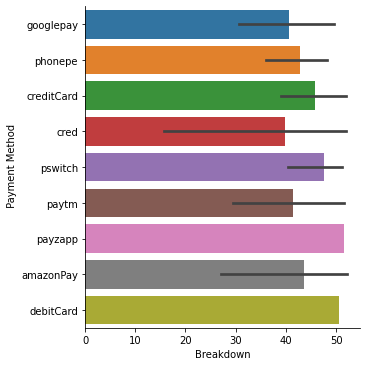

In [56]:
sns.catplot(x="Breakdown", y=" Payment Method" ,kind="bar",data=Anna)
figsize=(15,30)


In [46]:
group.agg(['mean','count']).reset_index(drop=False)

,Payment Method,mean,count
0,amazonPay,43.636394,6
1,cred,39.821524,4
2,creditCard,45.818502,5
3,debitCard,50.531366,2
4,googlepay,40.616718,13
5,paytm,41.514912,9
6,payzapp,51.558648,1
7,phonepe,42.808898,31
8,pswitch,47.552422,6


In [24]:
Data1[' Payment Method'].value_counts()

phonepe       46
pswitch       21
googlepay     19
paytm         12
creditCard     7
amazonPay      6
cred           5
debitCard      2
payzapp        1
Name:  Payment Method, dtype: int64

In [17]:
group.mean()

 Payment Method
amazonPay     43.636394
cred                inf
creditCard          inf
debitCard     50.531366
googlepay           inf
paytm               inf
payzapp       51.558648
phonepe             inf
pswitch             inf
Name: Breakdown, dtype: float64

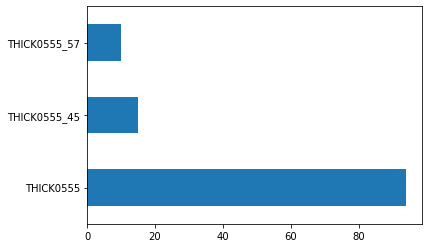

In [19]:
Data1[' Franchise_Code'].value_counts().plot(kind='barh');

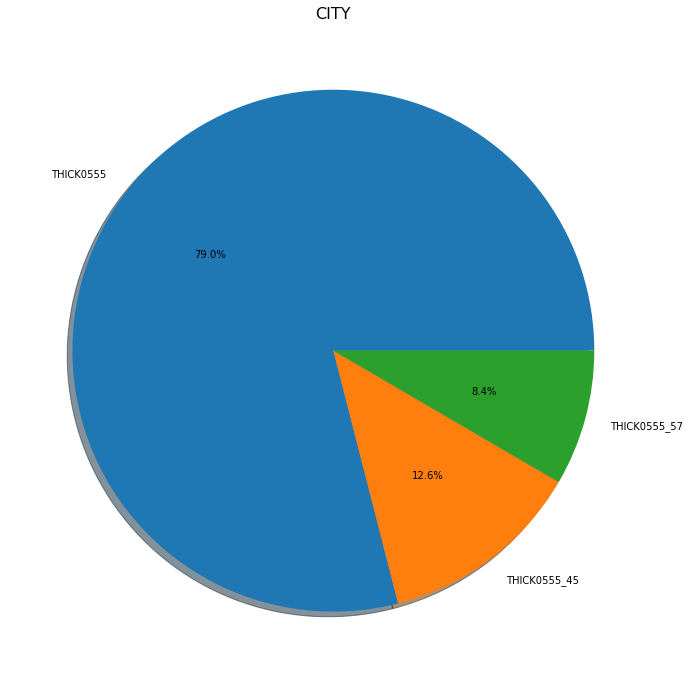

In [20]:

#pie chart for the target value

plt.figure(figsize= (12,12))
df_target= Data1[' Franchise_Code'].value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )

plt.title('CITY', fontsize= 16)

plt.show()

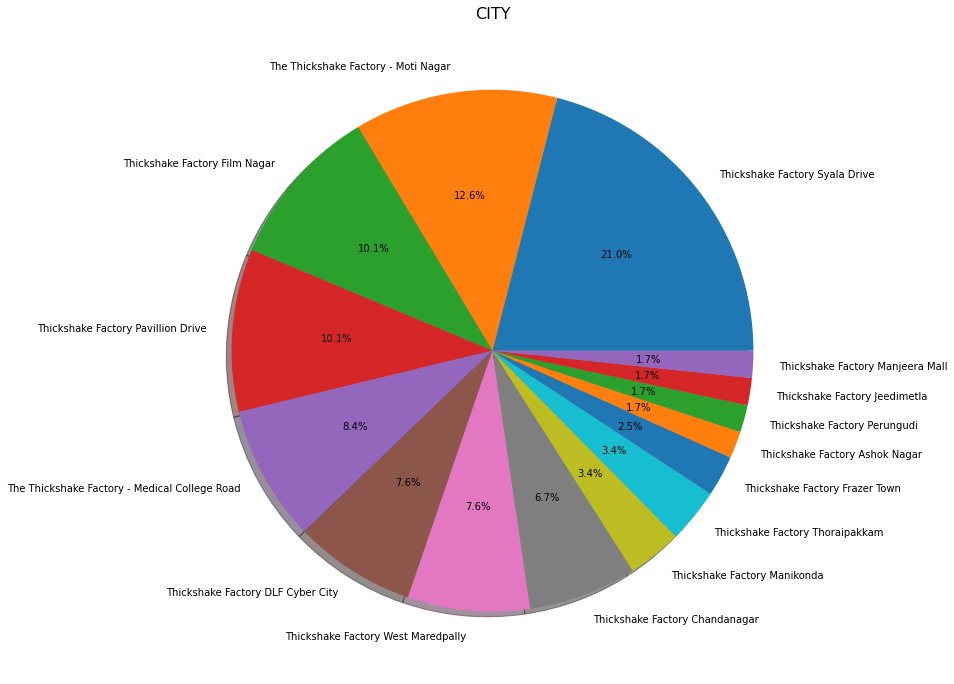

In [21]:
#pie chart for the target value

plt.figure(figsize= (12,12))
df_target= Data1[' Store name'].value_counts()
plt.pie(df_target, labels= df_target.index, autopct= '%.1f%%', shadow = True )

plt.title('CITY', fontsize= 16)

plt.show()

In [22]:
Data.head()

,StoreID,StoreName,OrderID,LeafOrderID,CustomerPhone,OrderAmount,PromoCode,OrderStatus,StatusDescription,OrderPlacedTime,OrderAcceptedTime,OrderDeliveredTime,RiderRequestedTime,RiderAssignedTime,RiderReportTime,RiderOutForDelTime,FinalDeliveryPartner
0,1589,Thickshake Factory Pavillion Drive,4672183,5545642,9078986515,187.56,TTSF40,20,Order Delivered,2021-06-01 13:57:35,2021-06-01 14:45:30,2021-06-01 15:24:59,2021-06-01 14:45:32,2021-06-01 14:53:45,2021-06-01 14:59:23,2021-06-01 15:05:03,dunzo
1,1581,Thickshake Factory Syala Drive,4673408,5546871,8341924630,258.12,TTSF50,20,Order Delivered,2021-06-01 15:22:43,2021-06-01 15:38:18,2021-06-01 15:53:34,2021-06-01 15:38:21,2021-06-01 15:38:35,2021-06-01 15:44:21,2021-06-01 15:45:37,dunzo
2,1591,Thickshake Factory West Maredpally,4674691,5548155,9000123763,0.00,TTSF50,27,Order rejected by delivery Partner,2021-06-01 16:52:46,2021-06-01 16:53:51,None,None,None,None,None,None
3,1595,Thickshake Factory Chandanagar,4678784,5552249,8790599183,0.00,TTSF50,27,Order rejected by delivery Partner,2021-06-01 22:06:16,2021-06-01 22:17:48,None,None,None,None,None,None
4,1581,Thickshake Factory Syala Drive,4681358,5554827,8801180540,258.12,TTSF50,20,Order Delivered,2021-06-02 14:20:59,2021-06-02 14:21:31,2021-06-02 14:33:47,2021-06-02 14:21:34,2021-06-02 14:21:42,2021-06-02 14:27:53,2021-06-02 14:28:43,dunzo
